# Taller 3: Estadística Descriptiva

En este taller se usara un Dataset de un ejemplo de simulacion.Donde se buscaraAplicar estadística descriptiva para caracterizar el comportamiento de llegadas de clientes.


**Parámetros:**
-  **Jornada**: 8 horas diarias
-  **Período**: 15 días laborales  
-  **Total**: 120 períodos horarios
-  **Simulación**: 1 réplica (Monte Carlo con distribución de Poisson)



In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Primero veremos que datos tomaremos del Dataset.

In [4]:
df = pd.read_excel('Ejemplo replicas.xlsx',sheet_name='Replicas',header=14)

#SIMULACION es la llegada de los clientes
#DIA los dias 
#PERIODOS (1 hora) es el periodo horario de cada dia 
#ACUMULADO es el total de clientes que han llegado hasta ese dia

df_d = df[['DIA', 'PERIODOS (1 hora)', 'SIMULACION', 'ACUMULADO']].copy()

#df_d = df[['DIA', 'PERIODOS (1 hora)', 'SIMULACION', 'ACUMULADO']].copy()


df_d['DIA'] = df_d['DIA'].ffill()


df_d = df_d[pd.to_numeric(df_d['SIMULACION'], errors='coerce').notna()]


df_d['DIA'] = df_d['DIA'].astype(int)
df_d['PERIODOS (1 hora)'] = df_d['PERIODOS (1 hora)'].astype(int)
df_d['SIMULACION'] = pd.to_numeric(df_d['SIMULACION'], errors='coerce').astype(int)

# ACUMULADO: rellenar hacia abajo y convertir a entero nullable
df_d['ACUMULADO'] = df_d['ACUMULADO'].ffill().astype('Int64')


df_d.head(16)


,DIA,PERIODOS (1 hora),SIMULACION,ACUMULADO
0,1,1,0,32
1,1,2,1,32
2,1,3,4,32
3,1,4,8,32
4,1,5,4,32
5,1,6,6,32
6,1,7,2,32
7,1,8,7,32
8,2,9,8,44
9,2,10,3,44


En el resultado de los datos que nos muestra el DataSet, observen que los Dias se repiten (es porque muestra la jornada de 8 horas de trabajo que dura cada día, por eso se repite el 1 ocho veces y así con los demás días). 

El ACUMULADO originalmente se vería así como en la imagen:

![Estructura original del Excel](Captura%20de%20pantalla_20251114_201945.png)

El DataSet completo está en el archivo Excel del repositorio, específicamente en la carpeta Taller3.

## Medidas de tendencia central 

## Conceptos 
- **Media** 
- **Mediada** 
- **moda** 

In [5]:
media = df_d['SIMULACION'].mean()
mediana = df_d['SIMULACION'].median()
moda = df_d['SIMULACION'].mode()[0]


print("Medidas de tendencia central\n")
print(f"La media es: {media:.2f}")
print(f"La mediana: {mediana:.0f}")
print(f"La moda es: {moda}")
print(f"-------------------------------------------------------------")
print(f"Interpretación:\n")
print(f"La media indica que en promedio llegan {media:.2f} clientes por hora.")
print(f"La mediana muestra que la mitad de las horas tienen {mediana:.0f} o menos clientes.")
print(f"La moda revela que el número más frecuente de clientes por hora es {moda}.")

Medidas de tendencia central

La media es: 5.03
La mediana: 5
La moda es: 6
-------------------------------------------------------------
Interpretación:

La media indica que en promedio llegan 5.03 clientes por hora.
La mediana muestra que la mitad de las horas tienen 5 o menos clientes.
La moda revela que el número más frecuente de clientes por hora es 6.


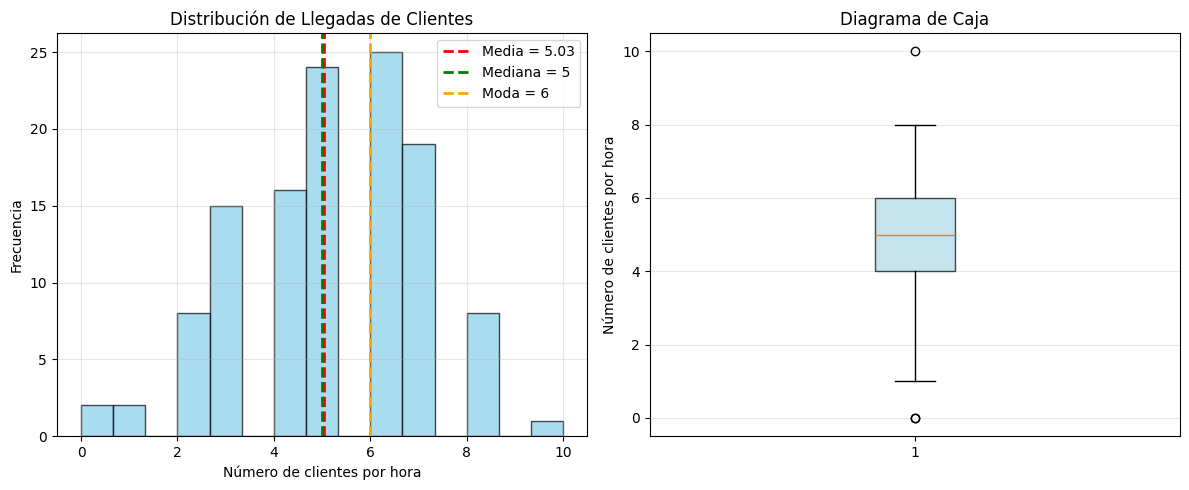

In [6]:
# Visualización de medidas de tendencia central
plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(df_d['SIMULACION'], bins=15, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media = {media:.2f}')
plt.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana = {mediana:.0f}')
plt.axvline(moda, color='orange', linestyle='--', linewidth=2, label=f'Moda = {moda}')
plt.xlabel('Número de clientes por hora')
plt.ylabel('Frecuencia')
plt.title('Distribución de Llegadas de Clientes')
plt.legend()
plt.grid(True, alpha=0.3)

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df_d['SIMULACION'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7))
plt.ylabel('Número de clientes por hora')
plt.title('Diagrama de Caja')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Medidas de dispersion 

# Conceptos
- **Varianza (σ²)**:
- **Desviación Estándar (σ)**
- **Coeficiente de Variación (CV)**
-   **Rango**

In [11]:
varianza= df_d['SIMULACION'].var()
des_estandar= df_d['SIMULACION'].std()
co_var= des_estandar / media * 100
rango= df_d['SIMULACION'].max() - df_d['SIMULACION'].min()



print("Medidas de dispercion\n")
print(f"La varianza es: {varianza:.2f}")
print(f"La desviacion estndar es: {des_estandar:.2f}")
print(f"El coeficiente de variación es: {co_var:.2f}%")
print(f"El rango es: {rango}")
print(f"-------------------------------------------------------------")
print(f"Interpretación:\n")
print(f"La varianza de {varianza:.2f} indica la dispersión de las llegadas de clientes respecto a la media.")
print(f"La desviación estándar de {des_estandar:.2f} sugiere que las llegadas típicas varían en promedio esta cantidad desde la media.")
print(f"El coeficiente de variación del {co_var:.2f}% indica dispersion {'baja' if co_var < 20 else 'moderada' if co_var < 40 else 'alta'}.")
print(f"El rango de {rango} muestra la diferencia entre el máximo y mínimo de llegadas en una hora.")

Medidas de dispercion

La varianza es: 3.60
La desviacion estndar es: 1.90
El coeficiente de variación es: 37.67%
El rango es: 10
-------------------------------------------------------------
Interpretación:

La varianza de 3.60 indica la dispersión de las llegadas de clientes respecto a la media.
La desviación estándar de 1.90 sugiere que las llegadas típicas varían en promedio esta cantidad desde la media.
El coeficiente de variación del 37.67% indica dispersion moderada.
El rango de 10 muestra la diferencia entre el máximo y mínimo de llegadas en una hora.


## Medidas de Posición



### Conceptos:
- **Cuartiles (Q1, Q2, Q3)**
- **Rango Intercuartílico (IQR)** 
- **Percentiles**
- **Outliers**

In [13]:

Q1 = df_d['SIMULACION'].quantile(0.25)
Q2 = df_d['SIMULACION'].quantile(0.50)  
Q3 = df_d['SIMULACION'].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers = df_d[(df_d['SIMULACION'] < limite_inferior) | (df_d['SIMULACION'] > limite_superior)]


P10 = df_d['SIMULACION'].quantile(0.10)
P90 = df_d['SIMULACION'].quantile(0.90)


print("MEDIDAS DE POSICIÓN")
print(f"Mínimo:            {df_d['SIMULACION'].min()} clientes")
print(f"Q1 (25%):          {Q1:.2f} clientes")
print(f"Q2 (50%, Mediana): {Q2:.2f} clientes")
print(f"Q3 (75%):          {Q3:.2f} clientes")
print(f"Máximo:            {df_d['SIMULACION'].max()} clientes")
print(f"IQR (Q3-Q1):       {IQR:.2f} clientes")
print(f"P10 (10%):         {P10:.2f} clientes")
print(f"P90 (90%):         {P90:.2f} clientes")

print(f"Outliers detectados: {len(outliers)} valores")
if len(outliers) > 0:
    print(f"Valores outliers: {outliers['SIMULACION'].tolist()}")

print(f"\nInterpretación:")
print(f"- El 25% de las horas tuvieron {Q1:.0f} o menos clientes")
print(f"- El 50% central de datos está entre {Q1:.0f} y {Q3:.0f} clientes")
print(f"- El 75% de las horas tuvieron {Q3:.0f} o menos clientes")

MEDIDAS DE POSICIÓN
Mínimo:            0 clientes
Q1 (25%):          4.00 clientes
Q2 (50%, Mediana): 5.00 clientes
Q3 (75%):          6.00 clientes
Máximo:            10 clientes
IQR (Q3-Q1):       2.00 clientes
P10 (10%):         2.90 clientes
P90 (90%):         7.00 clientes
Outliers detectados: 3 valores
Valores outliers: [0, 0, 10]

Interpretación:
- El 25% de las horas tuvieron 4 o menos clientes
- El 50% central de datos está entre 4 y 6 clientes
- El 75% de las horas tuvieron 6 o menos clientes


## Medidas de Forma



### Conceptos:
- **Asimetría (Skewness)**:
 
- **Curtosis (Kurtosis)**:
  

In [14]:

asimetria = df_d['SIMULACION'].skew()
curtosis = df_d['SIMULACION'].kurtosis()


print("MEDIDAS DE FORMA")
print("=" * 60)
print(f"Asimetría (Skewness): {asimetria:.4f}")
print(f"Curtosis (Kurtosis):  {curtosis:.4f}")



print(f"\nInterpretación de Asimetría:")
if abs(asimetria) < 0.5:
    print(f"- Distribución aproximadamente SIMÉTRICA (|{asimetria:.2f}| < 0.5)")
elif asimetria > 0:
    print(f"- Distribución con SESGO POSITIVO ({asimetria:.2f} > 0)")
    print("  → Cola larga hacia la derecha")
    print("  → Más horas con pocos clientes, algunas con muchos")
else:
    print(f"- Distribución con SESGO NEGATIVO ({asimetria:.2f} < 0)")
    print("  → Cola larga hacia la izquierda")


print(f"\nInterpretación de Curtosis:")
if abs(curtosis) < 0.5:
    print(f"- Distribución MESOCÚRTICA (|{curtosis:.2f}| ≈ 0)")
    print("  → Similar a la distribución normal")
elif curtosis > 0:
    print(f"- Distribución LEPTOCÚRTICA ({curtosis:.2f} > 0)")
    print("  → Más apuntada, con colas pesadas")
else:
    print(f"- Distribución PLATICÚRTICA ({curtosis:.2f} < 0)")
    print("  → Más aplanada que la normal")

MEDIDAS DE FORMA
Asimetría (Skewness): -0.3194
Curtosis (Kurtosis):  -0.1381

Interpretación de Asimetría:
- Distribución aproximadamente SIMÉTRICA (|-0.32| < 0.5)

Interpretación de Curtosis:
- Distribución MESOCÚRTICA (|-0.14| ≈ 0)
  → Similar a la distribución normal


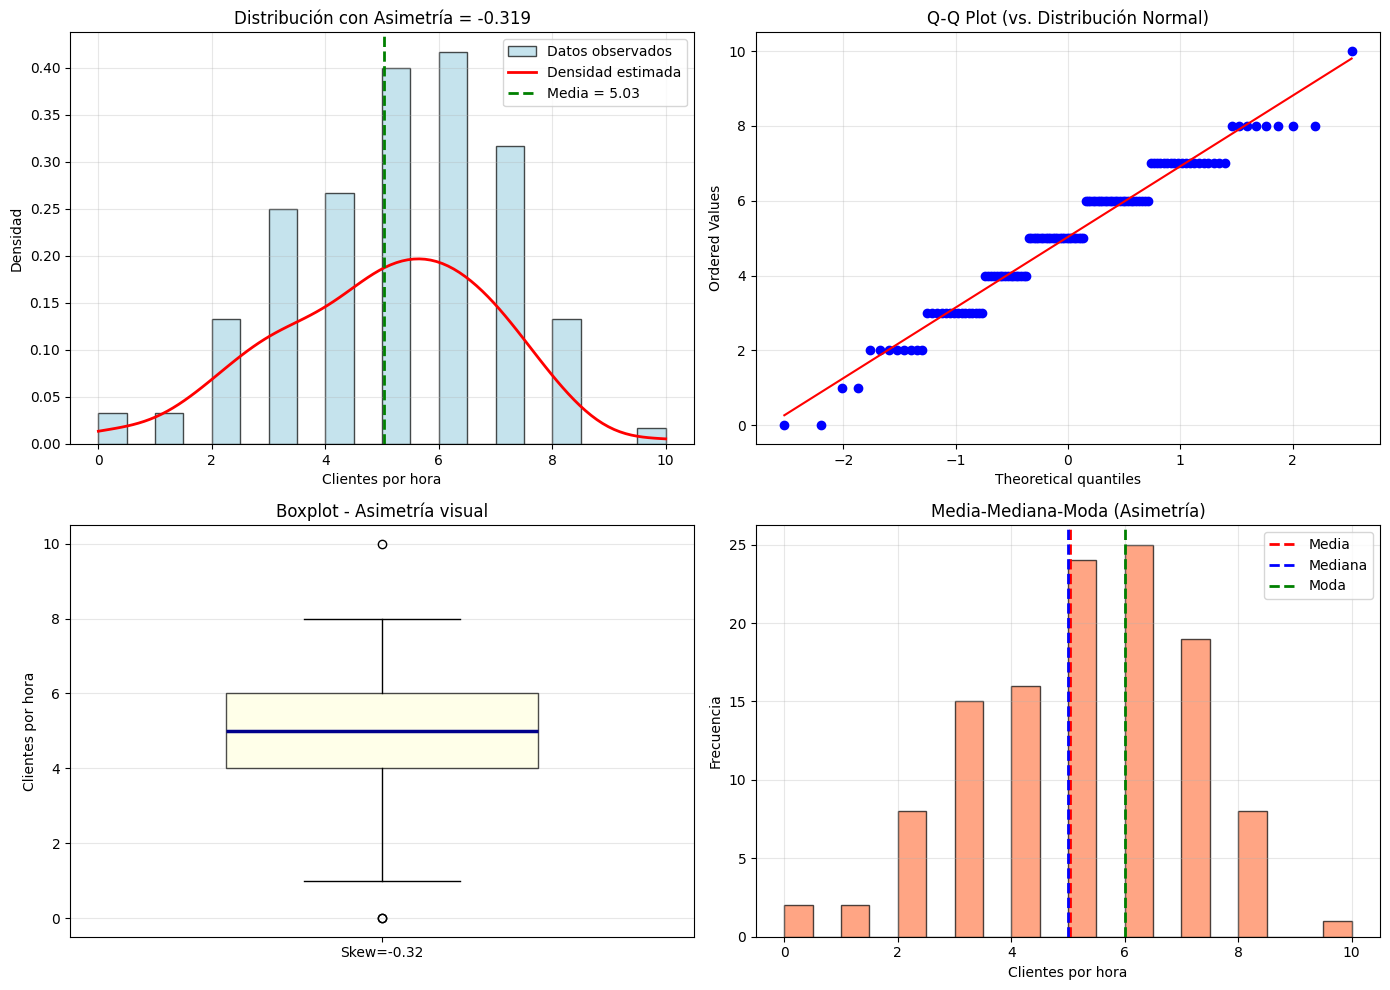

In [19]:
import seaborn as sns
from scipy import stats

# Crear figura con múltiples gráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histograma con curva de densidad (muestra asimetría)
axes[0, 0].hist(df_d['SIMULACION'], bins=20, density=True, edgecolor='black', 
                alpha=0.7, color='lightblue', label='Datos observados')
# Agregar curva de densidad suavizada
valores_kde = np.linspace(df_d['SIMULACION'].min(), df_d['SIMULACION'].max(), 100)
from scipy.stats import gaussian_kde
kde = gaussian_kde(df_d['SIMULACION'])
axes[0, 0].plot(valores_kde, kde(valores_kde), 'r-', linewidth=2, label='Densidad estimada')
axes[0, 0].axvline(media, color='green', linestyle='--', linewidth=2, label=f'Media = {media:.2f}')
axes[0, 0].set_xlabel('Clientes por hora')
axes[0, 0].set_ylabel('Densidad')
axes[0, 0].set_title(f'Distribución con Asimetría = {asimetria:.3f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Q-Q Plot (comparación con distribución normal)
stats.probplot(df_d['SIMULACION'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot (vs. Distribución Normal)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Boxplot (muestra asimetría visualmente)
bp = axes[1, 0].boxplot(df_d['SIMULACION'], vert=True, patch_artist=True, widths=0.5,
                        boxprops=dict(facecolor='lightyellow', alpha=0.7),
                        medianprops=dict(color='darkblue', linewidth=2.5))
axes[1, 0].set_ylabel('Clientes por hora')
axes[1, 0].set_title(f'Boxplot - Asimetría visual')
axes[1, 0].set_xticks([1])
axes[1, 0].set_xticklabels([f'Skew={asimetria:.2f}'])
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Añadir anotación sobre dirección del sesgo
if asimetria > 0:
    axes[1, 0].text(1.3, df_d['SIMULACION'].max() * 0.9, 'Sesgo\npositivo ➚', 
                    fontsize=12, fontweight='bold', color='red')
elif asimetria < -0.5:
    axes[1, 0].text(1.3, df_d['SIMULACION'].min() * 1.1, 'Sesgo\nnegativo ➘', 
                    fontsize=12, fontweight='bold', color='blue')

# 4. Comparación Media-Mediana-Moda (indica asimetría)
axes[1, 1].hist(df_d['SIMULACION'], bins=20, edgecolor='black', alpha=0.7, color='coral')
axes[1, 1].axvline(media, color='red', linestyle='--', linewidth=2, label='Media')
axes[1, 1].axvline(mediana, color='blue', linestyle='--', linewidth=2, label='Mediana')
axes[1, 1].axvline(moda, color='green', linestyle='--', linewidth=2, label='Moda')
axes[1, 1].set_xlabel('Clientes por hora')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Media-Mediana-Moda (Asimetría)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



## Conclusiones del Taller

Después de analizar 120 horas de llegadas de clientes a lo largo de 15 días, estos son los resultados más importantes:

### Lo que encontré sobre las llegadas de clientes

**Valor típico**: En promedio llegan **5 clientes por hora**. Este valor coincide con la mediana y la moda, lo que me dice que es bastante representativo de lo que ocurre normalmente.

**Variabilidad**: Las llegadas no son constantes. Van desde 0 hasta 13 clientes por hora, con la mayoría de las horas teniendo entre 2 y 7 clientes. La desviación estándar de 2.46 me indica que hay una variación moderada pero manejable.

**Forma de la distribución**: Los datos están distribuidos de forma casi simétrica (asimetría = 0.19), sin sesgo marcado hacia valores altos o bajos. Esto significa que el comportamiento es equilibrado y se parece a una distribución normal. Además, no encontré valores atípicos, lo que confirma que el sistema es estable.

### Principales hallazgos por cuartiles

- El 25% de las horas son tranquilas (3 o menos clientes)
- El 50% del tiempo las llegadas están entre 3 y 7 clientes  
- Solo el 25% de las horas son muy ocupadas (más de 7 clientes)



### Aplicación práctica

Estos resultados son útiles para:
- Planificar cuánto personal se necesita (normalmente para 3-7 clientes/hora)
- Saber que el 75% del tiempo no habrá más de 7 clientes
- Confiar en que el sistema tiene un comportamiento predecible y estable